In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

In [8]:
df.loc[df['concavity_se'] == 0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Exploratory Data

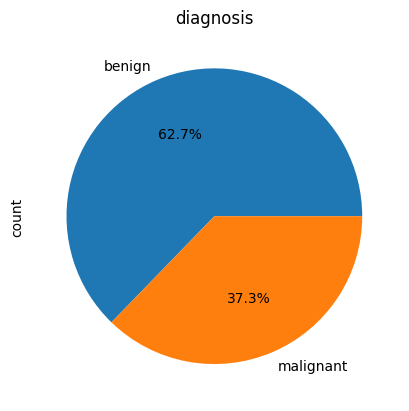

In [10]:
count = df['diagnosis'].value_counts()
count.plot.pie(column=count, title='diagnosis', labels=['benign','malignant'], autopct='%1.1f%%');


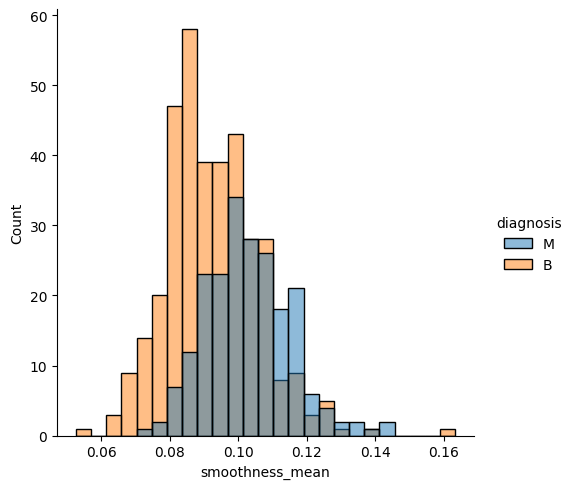

In [11]:
sns.displot(data=df, x='smoothness_mean', hue='diagnosis', palette='tab10');

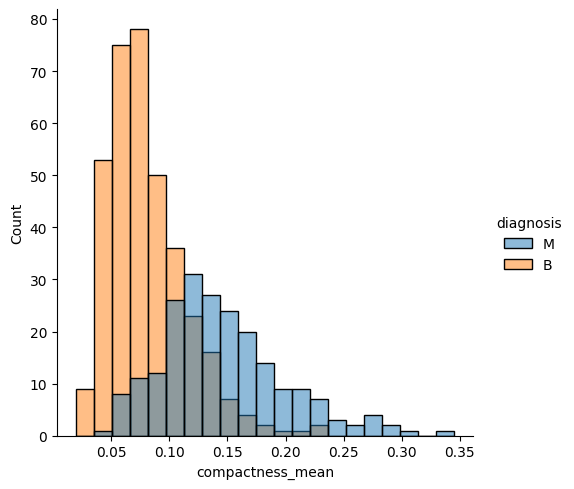

In [12]:
sns.displot(data=df, x='compactness_mean', hue='diagnosis', palette='tab10');

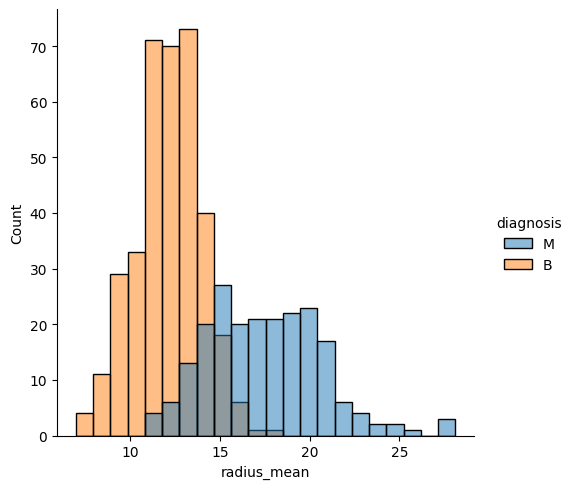

In [13]:
sns.displot(data=df, x='radius_mean', hue='diagnosis', palette='tab10');

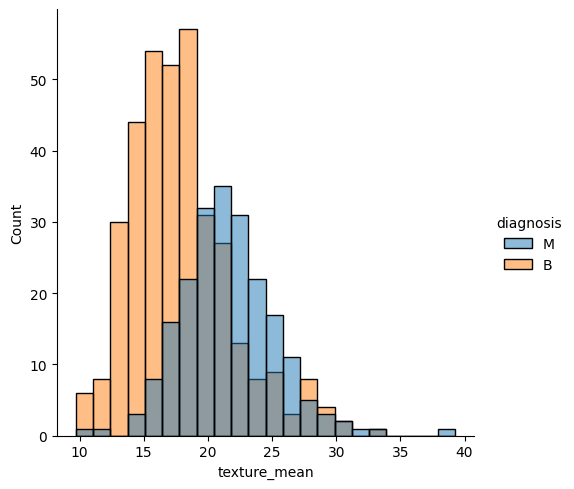

In [14]:
sns.displot(data=df, x='texture_mean', hue='diagnosis', palette='tab10');

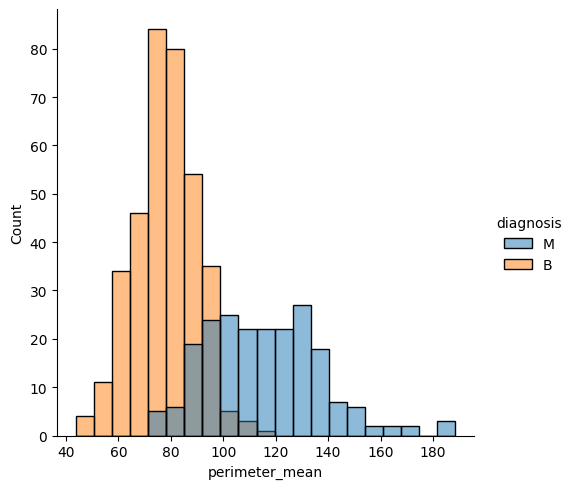

In [15]:
sns.displot(data=df, x='perimeter_mean', hue='diagnosis', palette='tab10');

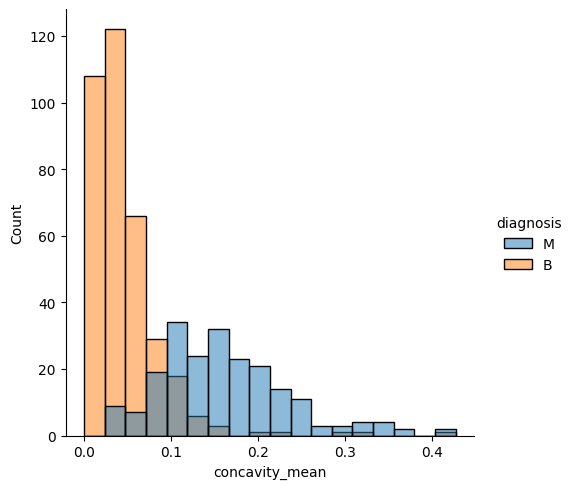

In [16]:
sns.displot(data=df, x='concavity_mean', hue='diagnosis', palette='tab10');

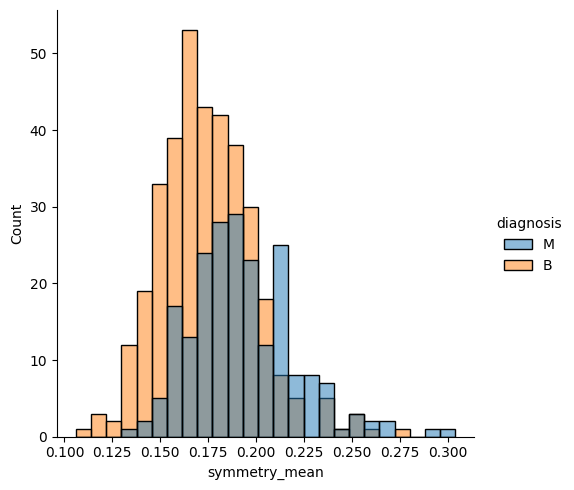

In [17]:
sns.displot(data=df, x='symmetry_mean', hue='diagnosis', palette='tab10');

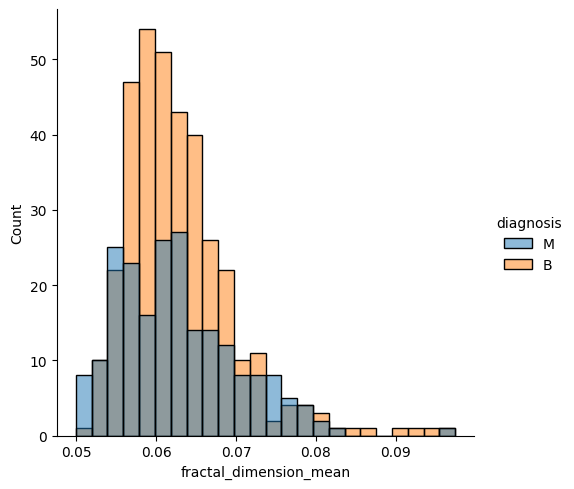

In [18]:
sns.displot(data=df, x='fractal_dimension_mean', hue='diagnosis', palette='tab10');

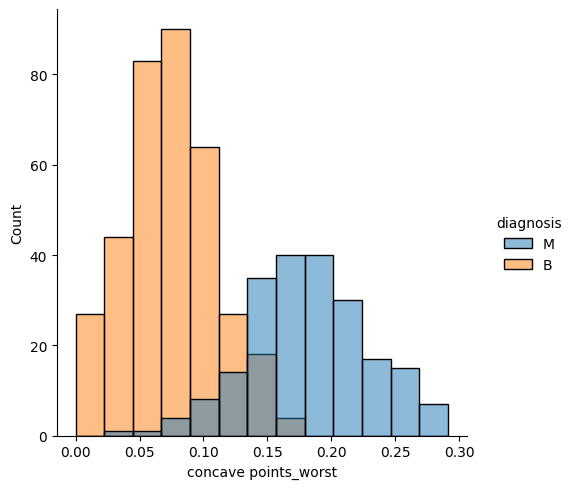

In [19]:
sns.displot(data=df, x='concave points_worst', hue='diagnosis', palette='tab10');

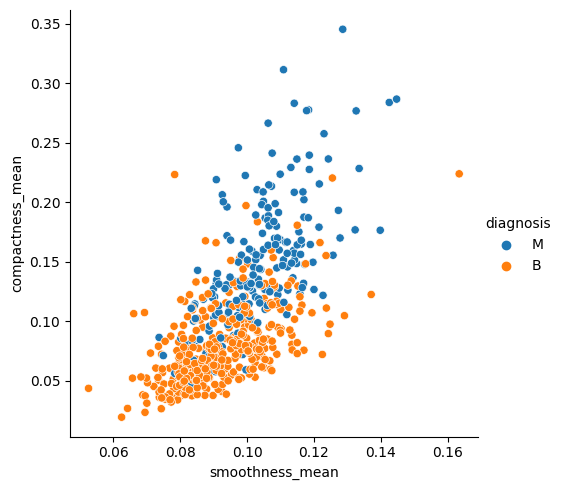

In [20]:
sns.relplot(data=df, x='smoothness_mean', y='compactness_mean', hue='diagnosis')

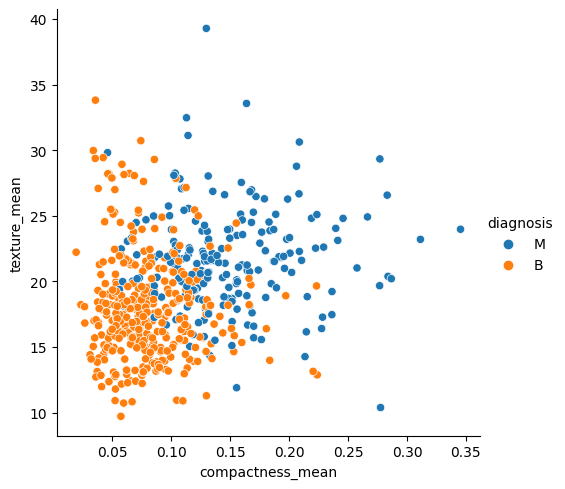

In [21]:
sns.relplot(data=df, x='compactness_mean', y='texture_mean', hue='diagnosis')

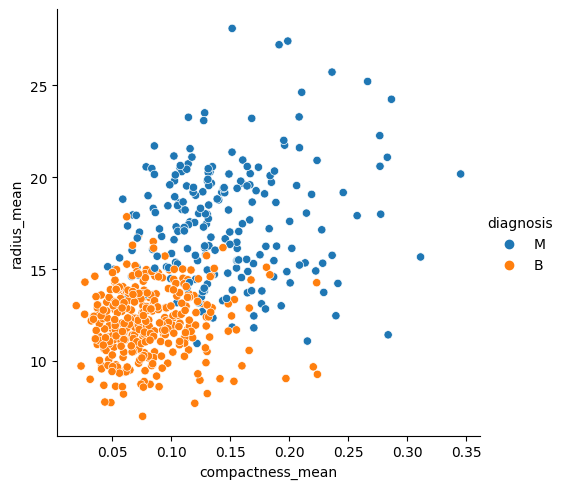

In [22]:
sns.relplot(data=df, y='radius_mean', x='compactness_mean', hue='diagnosis')

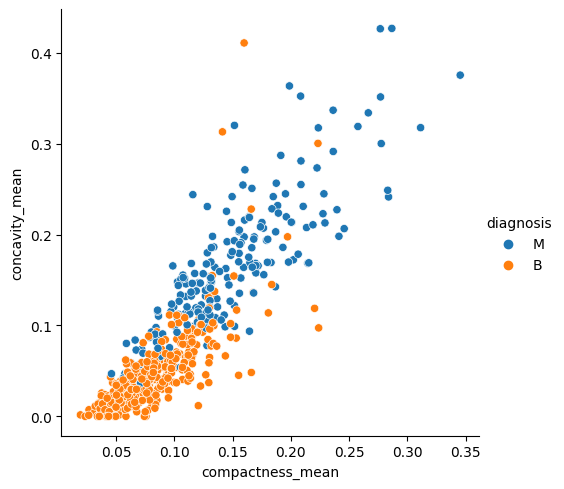

In [23]:
sns.relplot(data=df, y='concavity_mean', x='compactness_mean', hue='diagnosis')

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

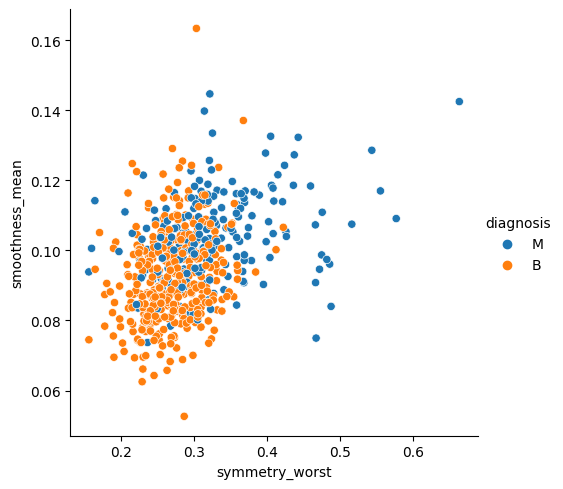

In [25]:
sns.relplot(data=df, y='smoothness_mean', x='symmetry_worst', hue='diagnosis')

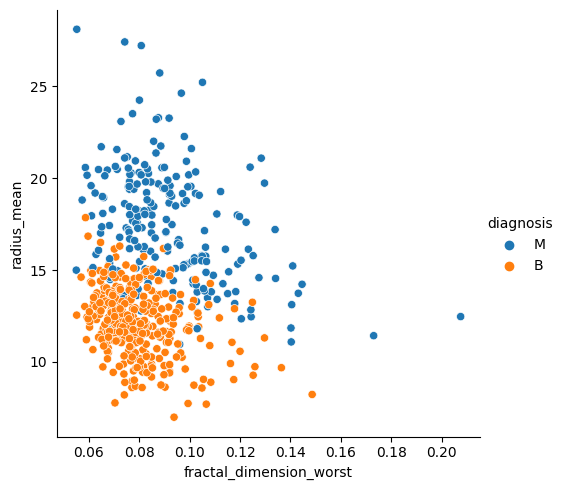

In [26]:
sns.relplot(data=df, y='radius_mean', x='fractal_dimension_worst', hue='diagnosis')

<Axes: >

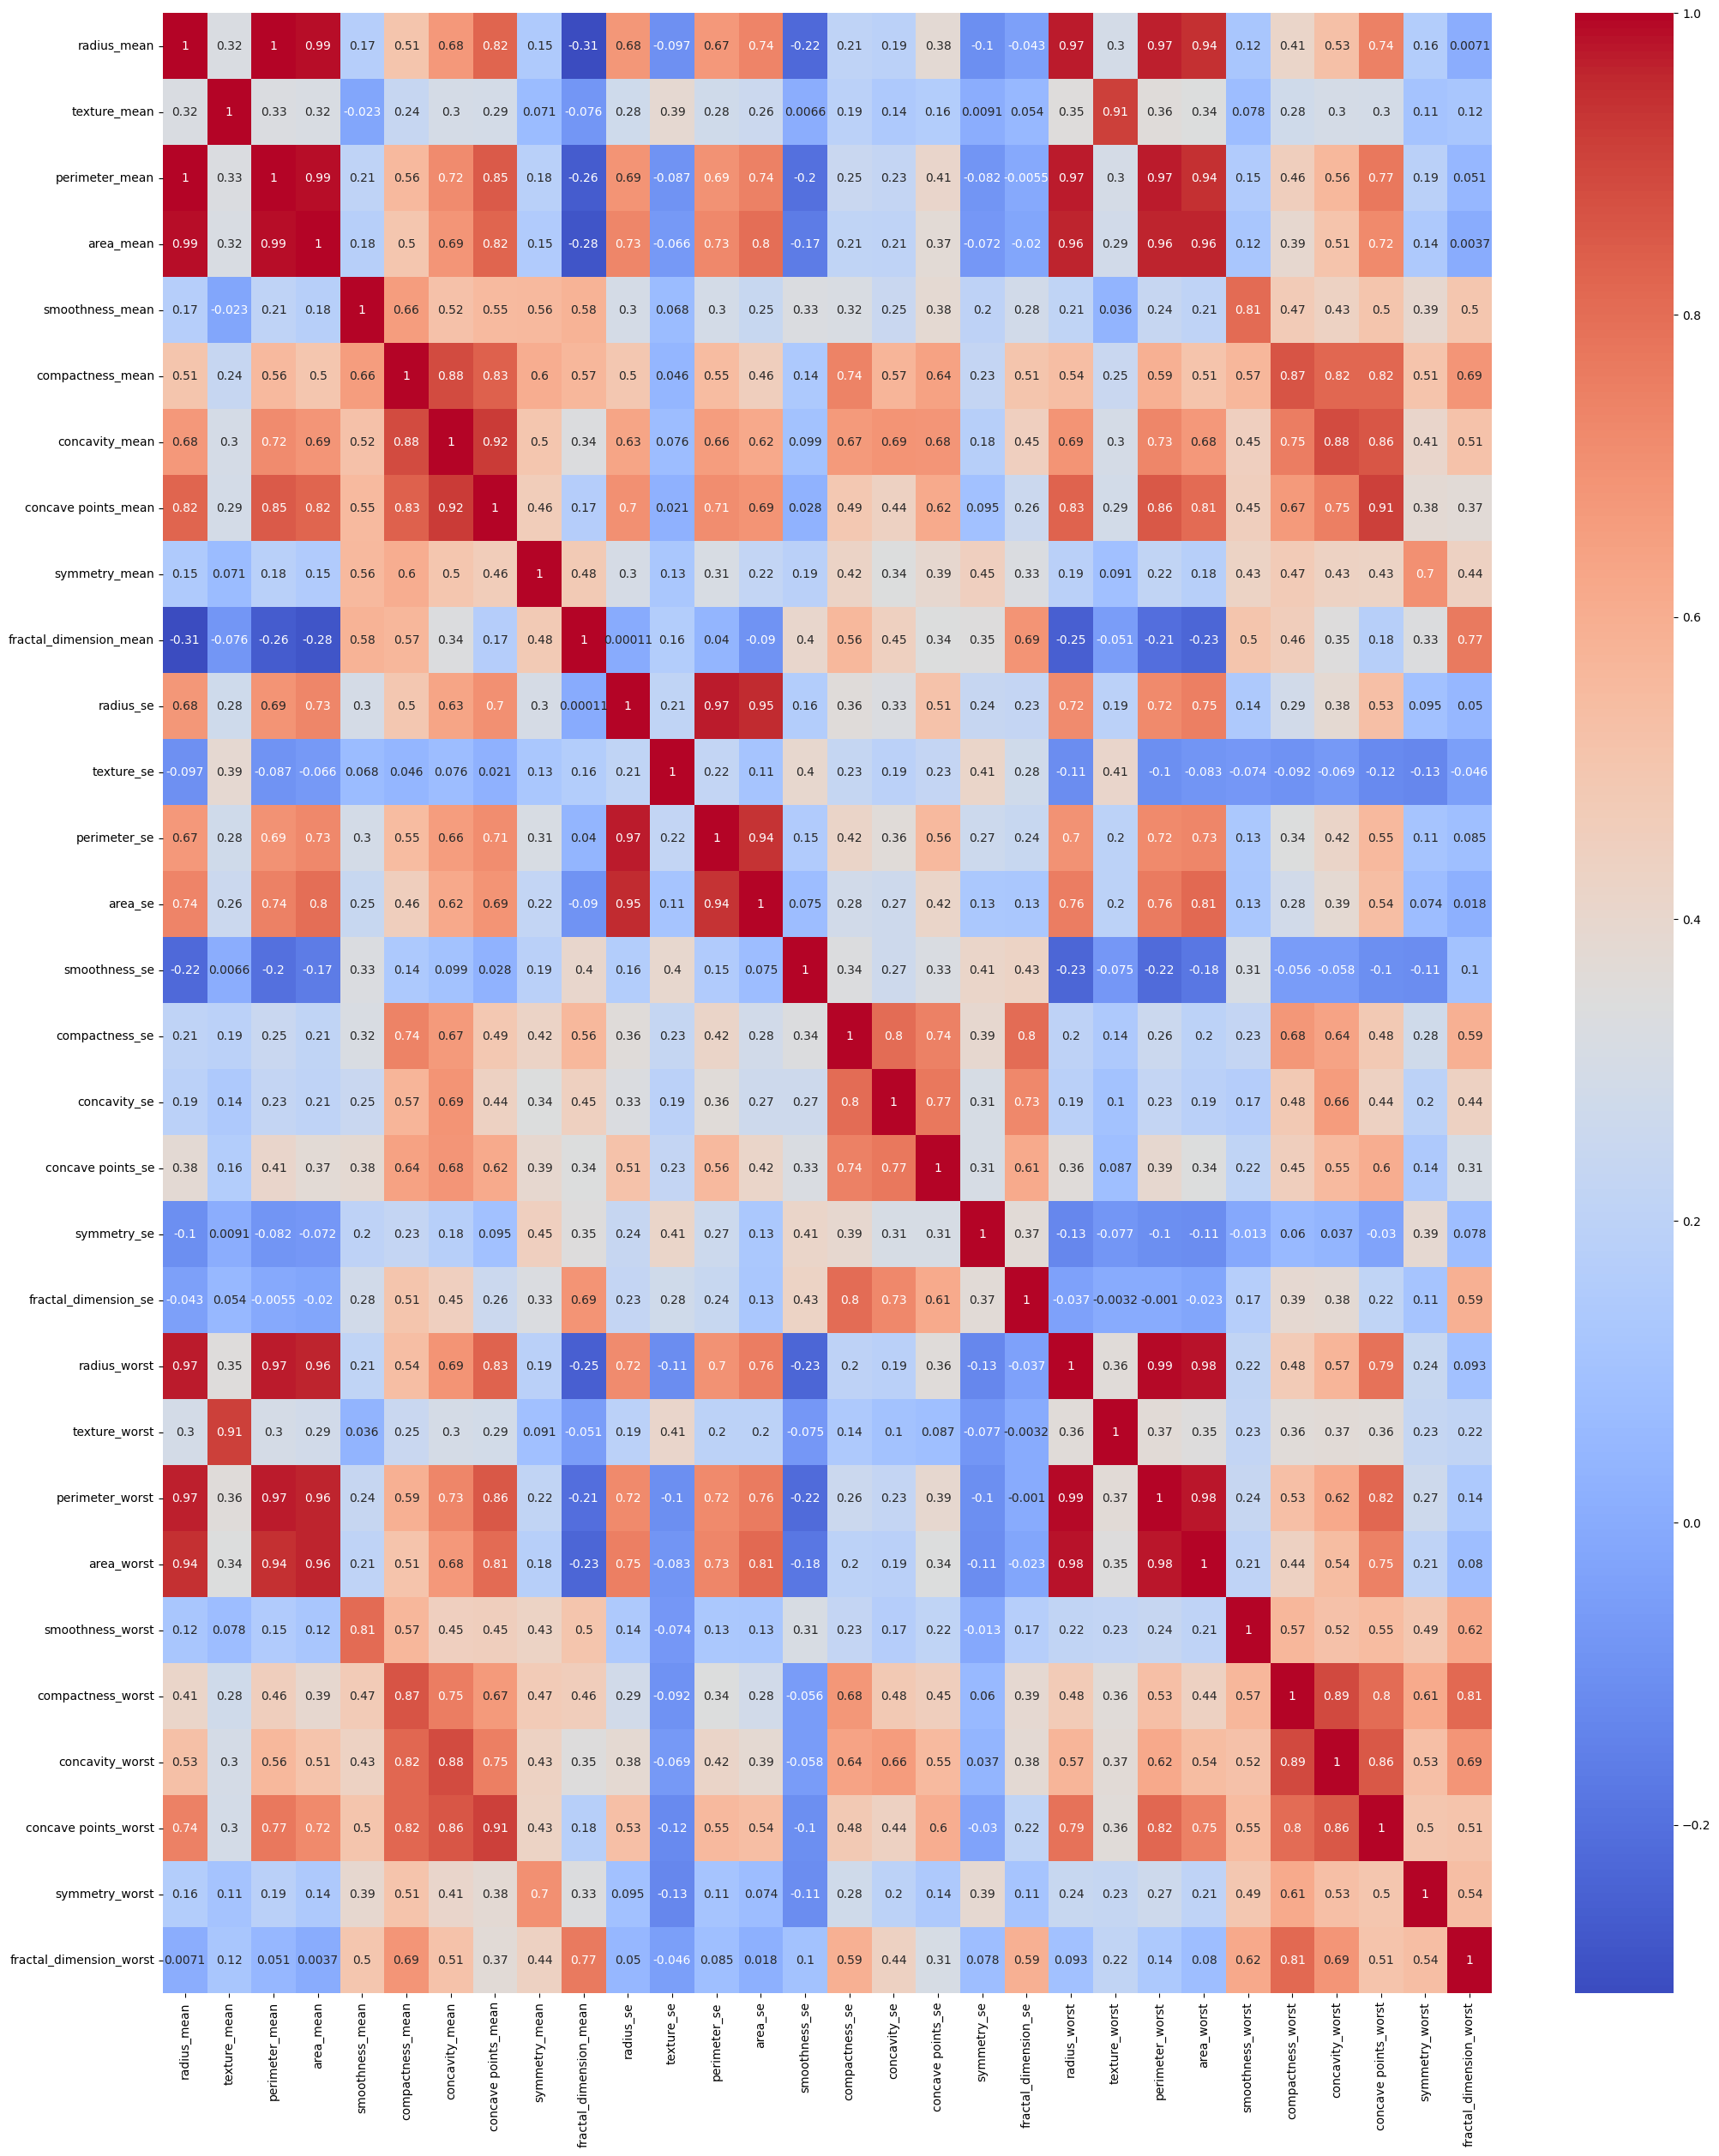

In [27]:
fig = plt.figure(figsize=(25, 30))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

In [28]:
df['diagnosis'].replace({'M': 1, 'B': 2}, inplace=True)

## modeling

In [29]:
X = df.drop(columns='diagnosis')

In [30]:
y = df['diagnosis']

In [31]:
sci_x = StandardScaler()

In [32]:
X = sci_x.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [34]:
lreg = LogisticRegression(random_state=42, max_iter=150)

In [35]:
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=150, random_state=42)

In [36]:
y_predict = lreg.predict(X_test)

In [37]:
accuracy_score(y_test, y_predict)

0.9824561403508771